<!-- vscode-jupyter-toc -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
<a id='toc0_'></a>**Содержание**    
- [Жадные алгоритмы: введение](#toc1_)    
  - [Основные идеи](#toc1_1_)    
  - [Задача на программирование: покрыть отрезки точками](#toc1_2_)    
  - [Задача на программирование: непрерывный рюкзак](#toc1_3_)    
  - [Задача на программирование: различные слагаемые](#toc1_4_)    
  - [Теоретическая задача для самостоятельной проверки: сдача минимальным количеством монет](#toc1_5_)    
- [Код Хаффмана](#toc2_)    
  - [Задача на программирование: кодирование Хаффмана](#toc2_1_)    
- [Декодирование](#toc3_)    
  - [Теоретическая задача для самостоятельной проверки: свойство кода Хаффмана](#toc3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- /vscode-jupyter-toc -->

# <a id='toc1_'></a>[Жадные алгоритмы: введение](#toc0_)
основные задачи:  
1.Покрытие набора точек на прямой минимальным количеством отрезков фиксированной длины  
2.Задача о выборе заявок - максимальное количество попарно непересекающихся отрезков на прямой  
3.Планирование вечеринки в компании - независимое множество (множество несоединённых друг с другом вершин)максимального размера  
4.Непрерывный рюкзак - максимальная стоимость частей предметовсуммарного веса не более заданного  

## <a id='toc1_1_'></a>[Основные идеи](#toc0_)
Надёжный шаг. Существует оптимальное решение,согласованное с локальным жадным шагом.  
Оптимальность подзадач. Задача, остающаяся послежадного шага, имеет тот же тип.

Суть жадности по видимому в том, что в результате "надежного шага" из условий в оптимальное решение перекладывается одно из условий и при этом задача не меняется по сути. Алгоритм работает до исключения всех условий.

## <a id='toc1_2_'></a>[Задача на программирование: покрыть отрезки точками](#toc0_)


По данным n отрезкам необходимо найти множество точек минимального размера, для которого каждый из отрезков содержит хотя бы одну из точек.

В первой строке дано число 1≤n≤100 отрезков. Каждая из последующих n строк содержит по два числа 0≤l≤r≤10^9, задающих начало и конец отрезка. Выведите оптимальное число m точек и сами m точек. Если таких множеств точек несколько, выведите любое из них.

In [1]:
class inputer():
    def __init__(self):
        self._ptr = 0
    def __call__(self):
        self._ptr += 1
        try:
            return INPUTS.splitlines()[self._ptr-1]
        except IndexError:
            self._ptr = 1
            return INPUTS.splitlines()[self._ptr-1]
        
input = inputer()

In [2]:
INPUTS = """4
4 7
1 3
2 5
5 6"""

In [3]:
segments = []
n = int(input())
for i in range(n):
    l, r = map(int, input().split())
    segments.append([l, r])

In [4]:
n, segments

(4, [[4, 7], [1, 3], [2, 5], [5, 6]])

In [5]:
# (1) упорядочить по правым границам, (2) брать правые точки, (3) пропускать отрезки, куда последняя взятая точка уже входит

segments.sort(key=lambda x: x[1])
segments

[[1, 3], [2, 5], [5, 6], [4, 7]]

In [6]:
M = []
M.append(segments[0][1])
for s in segments[1:]:
    if s[0] > M[-1]:
        M.append(s[1])

print(len(M))      
for m in M:
    print(m, end=' ')

2
3 6 

## <a id='toc1_3_'></a>[Задача на программирование: непрерывный рюкзак](#toc0_)


Первая строка содержит количество предметов 1≤n≤10^3  и вместимость рюкзака 0≤W≤2*10^6 . Каждая из следующих n строк задаёт стоимость 0≤ci≤2*10^6 и объём 0<wi≤2⋅10^6 предмета (n, W, ci​, wi​ — целые числа). Выведите максимальную стоимость частей предметов (от каждого предмета можно отделить любую часть, стоимость и объём при этом пропорционально уменьшатся), помещающихся в данный рюкзак, с точностью не менее трёх знаков после запятой.

In [7]:
INPUTS = """3 50
60 20
100 50
120 30"""

In [8]:
things = []
n, W = map(int, input().split())
for i in range(n):
    costs, weights = map(int, input().split())
    things.append([costs, weights])

n, W, things

(3, 50, [[60, 20], [100, 50], [120, 30]])

In [9]:
# (1) упорядочить по убыванию удельной стоимости, (2) брать максимальное количество самого дорогого, (3) заполнять до исчерпания объема
things.sort(key=lambda x: x[0] / x[1], reverse=True)  # стоимость / объем
things


[[120, 30], [60, 20], [100, 50]]

In [10]:
curr_cost, curr_weight = 0, 0
for t in things:
    if curr_weight <= W:
        put_weight = min(W - curr_weight, t[1])
        curr_cost += put_weight * ( t[0] / t[1] ) 
        curr_weight += put_weight
    else:
        break

print('{:.3f}'.format(curr_cost))

180.000


## <a id='toc1_4_'></a>[Задача на программирование: различные слагаемые](#toc0_)

По данному числу 1≤n≤10^9 найдите максимальное число k, для которого n можно представить как сумму k различных натуральных слагаемых. Выведите в первой строке число k, во второй — k слагаемых.

In [11]:
INPUTS = """6"""

In [12]:
n = int(input())
max_i, prev_S, curr_S = 0, 0, 0

i = 0
while curr_S <= n:
    i += 1
    curr_S, prev_S = curr_S + i, curr_S 
    
max_i = i - 1 
print(max_i)
for i in range(max_i-1):
    print(i+1, end=' ')
print(n - prev_S + max_i)

3
1 2 3


In [13]:
def max_summand(n):
    i, prev_S, curr_S = 0, 0, 0
    
    while curr_S <= n:
        i += 1
        curr_S, prev_S = curr_S + i, curr_S 
        
    return i - 1 

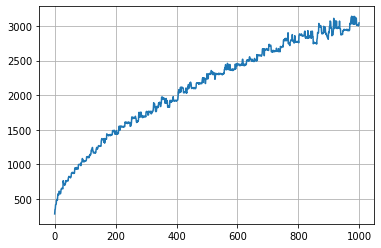

In [14]:
from matplotlib import pyplot as plt
import time

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter_ns()
        f(*args)
        t1 = time.perf_counter_ns()
        acc = min(acc, t1 - t0)
    return acc

xs = list(range(1000))
plt.plot(xs, [timed(max_summand, x, n_iter=10) for x in xs])
plt.grid(True)
plt.show()


## <a id='toc1_5_'></a>[Теоретическая задача для самостоятельной проверки: сдача минимальным количеством монет](#toc0_)

Постройте жадный алгоритм, который получает на вход натуральное число n и за время O(n) находит минимальное число монет номиналом 1 копейка, 5 копеек, 10 копеек и 25 копеек, с помощью которых можно выдать сдачу в n копеек. (Как всегда, нужно описать алгоритм, доказать его корректность и оценку на время работы. Приводить псевдокод нужно только в том случае, если вам кажется, что он поможет читателю лучше понять ваш алгоритм.)

Приведите пример номиналов монет, для которых жадный алгоритм построит неоптимальное решение. В множество номиналов должна входить монета номиналом 1 копейка, чтобы любую сумму n можно было разменять этими монетами.


In [15]:
# упорядочить номиналы по убыванию, целочисленное деление, остаток делится на следующий номинал

# <a id='toc2_'></a>[Код Хаффмана](#toc0_)

Сообщение кодируется в зависимости от частоты символов - более частые кодируются коротким кодом, в результате все неплохо сжимается.
Тоже разновидность жадного алгоритма, выкидываются самые частые, процедура повторяется.
## <a id='toc2_1_'></a>[Задача на программирование: кодирование Хаффмана](#toc0_)

По данной непустой строке s длины не более 10^4, состоящей из строчных букв латинского алфавита, постройте оптимальный беспрефиксный код. В первой строке выведите количество различных букв k, встречающихся в строке, и размер получившейся закодированной строки. В следующих k строках запишите коды букв в формате "letter: code". В последней строке выведите закодированную строку.

In [16]:
INPUTS = "abacabad"

In [17]:
class Huffman():
    """итеративный наивный вариант"""
    def __init__(self, msg=''):
        self.freqs = {}
        self.codes = {}
        self.tree = {}
        self.msg = msg
        self.coded = ''
    
    def encode(self, msg):
        self.__init__(msg)
        self._get_freqs()
        self._make_tree()
        self._make_codes()
        
        for i in range(len(msg)):
            self.coded += self.codes[msg[i]]
        return self.coded
    
    def report(self):
        print(len(self.codes), len(self.coded))
        for k, v in sorted(self.codes.items(), key=lambda item: item[1], reverse=True):
            print("{}: {}".format(k, v))
        print(self.coded)

    def _get_freqs(self):
        for i in range(len(self.msg)):
            if self.freqs.get(self.msg[i], 0):
                self.freqs[self.msg[i]] += 1
            else:
                self.freqs[self.msg[i]] = 1
        self._S = sorted(self.freqs.items(), key=lambda item: item[1], reverse=True)
    
    def _make_tree(self):
        def new_id(i):
            while True:
                i += 1
                yield i
        
        ni = new_id(100)
        
        while self._S:
            left = self._S.pop()
            if not self._S:  # если один узел
                self.tree[left[0]] = (-1, '0')
                break
            right = self._S.pop()
            w = left[1] + right[1]
            if not self._S:  # последний корневой узел
                new_node = (next(ni), w)
                self.tree[left[0]] = (new_node[0], '0')
                self.tree[right[0]] = (new_node[0], '1')
                break
                
            new_node = (next(ni), w)
            self.tree[left[0]] = (new_node[0], '0')
            self.tree[right[0]] = (new_node[0], '1')
            
            lenS = len(self._S)
            for i in range(lenS):
                if self._S[i][1] < w or i == lenS - 1:
                    pos = i if i != lenS - 1 else i + 1 
                    self._S.insert(pos, new_node)
                    break
            lenS = len(self._S)
        
    def _make_codes(self):
        def code(k):
            c = ''
            while self.tree.get(k, False):
                c = self.tree[k][1] + c
                k = self.tree[k][0]
            return c
        for k in self.freqs.keys():
            self.codes[k] = code(k)

h = Huffman()
h.encode(s)
h.report()

h.encode('accepted')

2 2
4: 1
7: 0
10


'10101010010011100110'

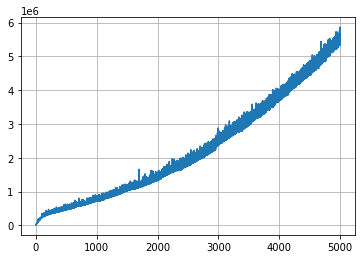

In [18]:
# график похож на n*log(n)
from matplotlib import pyplot as plt
import time, random, string

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter_ns()
        f(*args)
        t1 = time.perf_counter_ns()
        acc = min(acc, t1 - t0)
    return acc


N = 5000
sample = lambda x: ''.join(random.choice(string.ascii_letters + string.digits + ' ') for _ in range(x))
args = [sample(x) for x in range(N)]    # аргументы
xs = list(range(N))                     # подписи
plt.plot(xs, [timed(h.encode, x, n_iter=1) for x in args])
plt.grid(True)
plt.show()

# <a id='toc3_'></a>[Декодирование](#toc0_)

In [19]:
INPUTS = """4 14
a: 0
b: 10
c: 110
d: 111
01001100100111"""

In [20]:
input.__init__()
n, m = map(int, input().split())
codes = {}
for i in range(n):
    s, c = input().split(': ')
    codes[c] = s
coded = input()

chunk = ''
msg = ''
for i in range(m):
    chunk += coded[i]
    letter = codes.get(chunk, False)
    if letter:
        msg += letter
        chunk = ''

print(msg)

abacabad


## <a id='toc3_1_'></a>[Теоретическая задача для самостоятельной проверки: свойство кода Хаффмана](#toc0_)


Докажите, что если частоты всех символов меньше 1/3 (другими словами, каждый символ в исходную строку s входит строго меньше ∣s∣/3 раз), то коды всех символов в коде Хаффмана будут длиннее одного бита.


...рассматривается последний шаг - код длины один получается только, если это "тупиковый" потомок корня. Символов должно быть больше трех. Его частота должна быть больше, чем частоты двух других ветвей, объединных на предыдущем шаге, это значит, что его частота должна быть больше 1/3 читд

